In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [5]:
# fitting the regression model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
# predicting a new result
# no need yo use fit_transform as it's already fitted
y_pred = regressor.predict(sc_X.transform([[6.5]]))

# once you've got the depenedent variable we need to inverse scale 
# using the appropriate scaler
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])

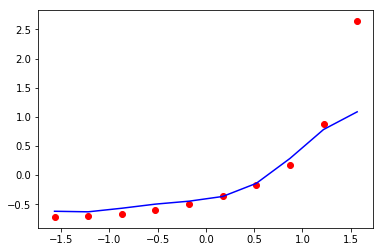

In [18]:
# visualising the regression results
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

ValueError: x and y must be the same size

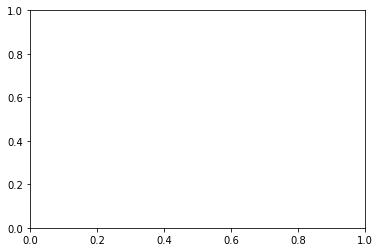

In [19]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X_grid, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()